In [1]:
#Import the required modules for vectors and matrix operations, data generation
import numpy as np
#Import the required modules for plot creation:
import matplotlib.pyplot as plt
#import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for model estimation:
import statsmodels.tsa as smt
#Import formula specification
import statsmodels.formula.api as smf
# Import pandas dataset
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
def tsdisplay(y, timeframe, figsize = (14, 8), title = "", lags = 20):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the time series
    tmp_data.plot(ax = fig.add_subplot(311), title = "$Time\ Series\ " + title + "$", legend = False)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325)) 
    plt.title("QQ Plot")
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 40)
    plt.title("Histogram")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.savefig('images/' + timeframe + '_arima_decomposition.pdf', format = "pdf", dpi = 300)
    plt.show()

In [3]:
def tsdiag(y, figsize = (14,8), title = "", lags = 10):
    #The data:
    tmp_data = pd.Series(y)
    #The Ljung-Box test results for the first k lags:
    tmp_acor = list(sm_stat.diagnostic.acorr_ljungbox(tmp_data, lags = lags, boxpierce = True))
    # get the p-values
    p_vals = pd.Series(tmp_acor[1])
    #Start the index from 1 instead of 0 (because Ljung-Box test is for lag values from 1 to k)
    p_vals.index += 1
    fig = plt.figure(figsize = figsize)
    #Plot the p-values:
    print(p_vals)
    p_vals.plot(ax = fig.add_subplot(313), linestyle='', marker='o', title = "p-values for Ljung-Box statistic", legend = False)
    #Add the horizontal 0.05 critical value line
    plt.axhline(y = 0.05, color = 'blue', linestyle='--')
    # Annotate the p-value points above and to the left of the vertex
    x = np.arange(p_vals.size) + 1
    for X, Y, Z in zip(x, p_vals, p_vals):
        plt.annotate(round(Z, 4), xy=(X,Y), xytext=(-5, 5), ha = 'left', textcoords='offset points')
    plt.show()
    # Return the statistics:
    col_index = ["Ljung-Box: X-squared", "Ljung-Box: p-value", "Box-Pierce: X-squared", "Box-Pierce: p-value"]
    return pd.DataFrame(tmp_acor, index = col_index, columns = range(1, len(tmp_acor[0]) + 1))

### Day

/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


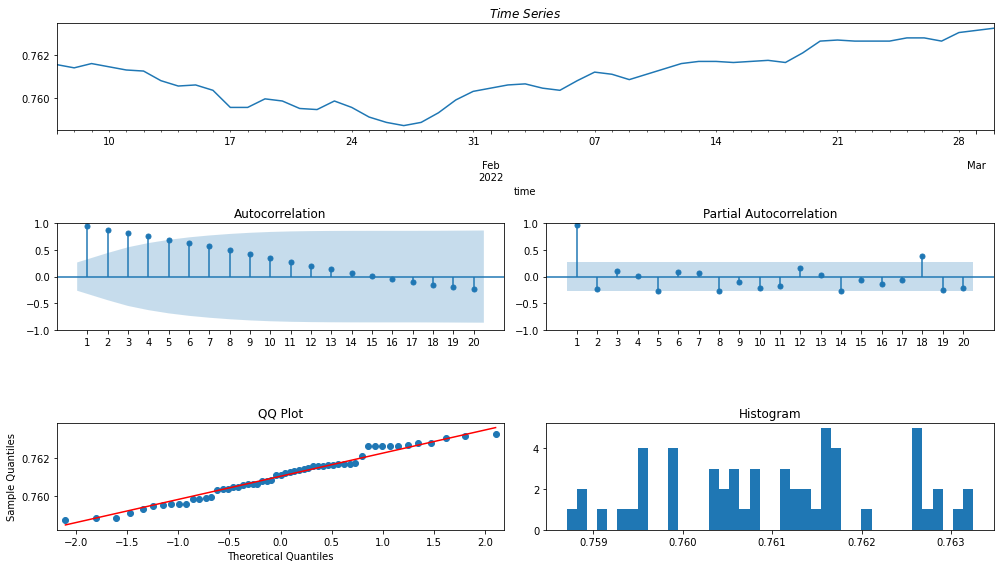

In [13]:
xrp = pd.read_csv("data/full_day.csv", parse_dates = ['time']).set_index('time')['XRP_price']
tsdisplay(xrp, "day")

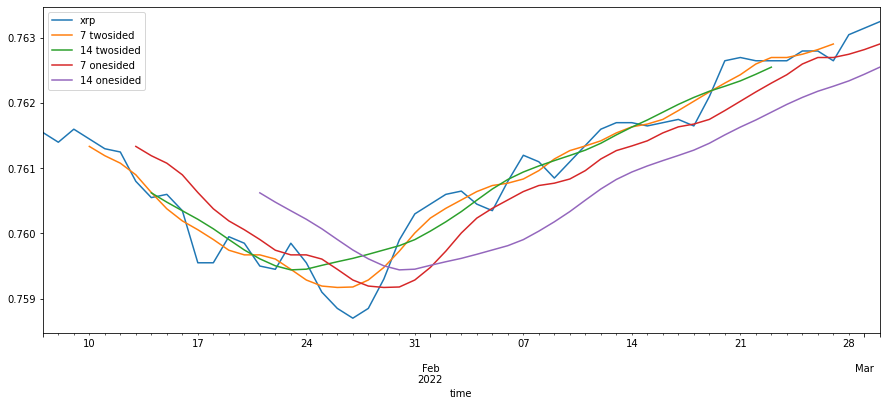

In [57]:
trend7ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 7,  two_sided = True).trend
trend14ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 14,  two_sided = True).trend
trend7os = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 7,  two_sided = False).trend
trend14os = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 14,  two_sided = False).trend


plt.figure(figsize = (15, 6))
xrp.plot(label = "xrp")
trend7ts.plot(label = "7 twosided")
trend14ts.plot(label = "14 twosided")
trend7os.plot(label = "7 onesided")
trend14os.plot(label = "14 onesided")

plt.legend()
plt.show()

###### Best is two-sided with period = 7

### Hour

/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


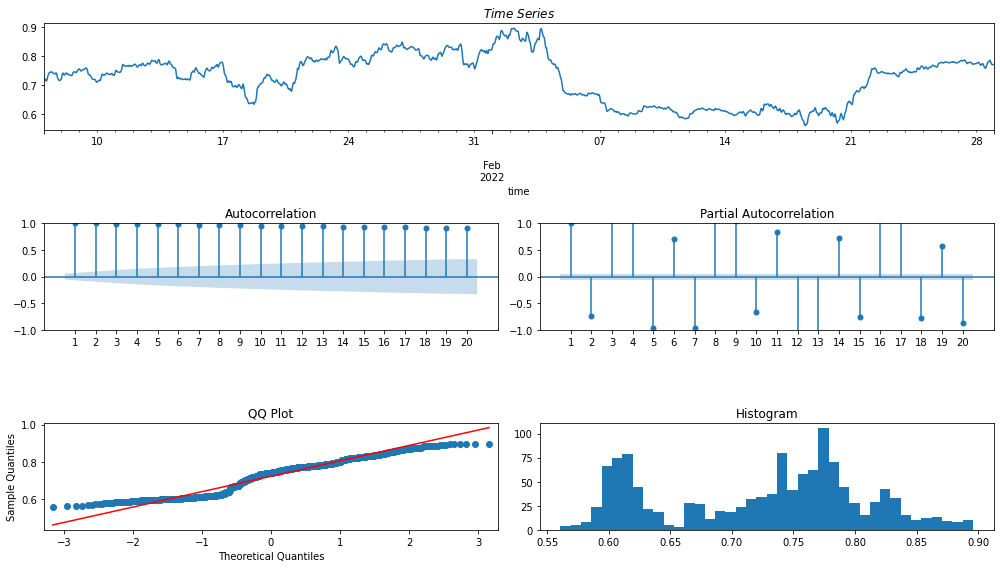

In [14]:
xrp = pd.read_csv("data/full_hour.csv", parse_dates = ['time']).set_index('time')['XRP_price']
tsdisplay(xrp, "hour")

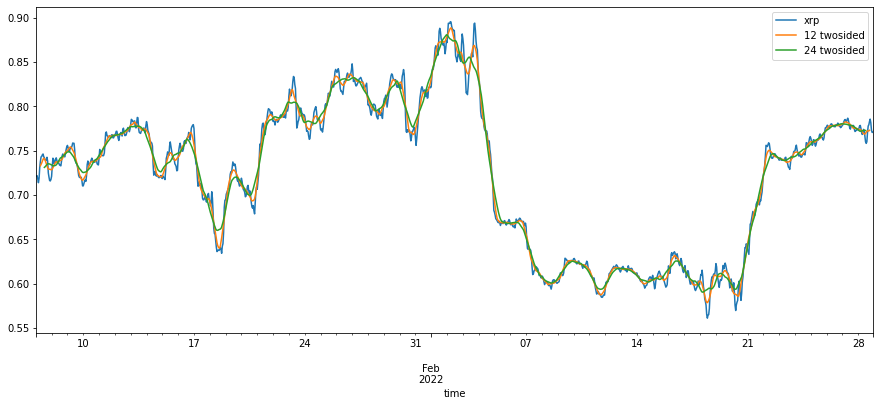

In [66]:
trend7ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 12,  two_sided = True).trend
trend14ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 24,  two_sided = True).trend
trend7os = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 12,  two_sided = False).trend
trend14os = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 24,  two_sided = False).trend


plt.figure(figsize = (15, 6))
xrp.plot(label = "xrp")
trend7ts.plot(label = "12 twosided")
trend14ts.plot(label = "24 twosided")
#trend7os.plot(label = "12 onesided")
#trend14os.plot(label = "24 onesided")

plt.legend()
plt.show()

###### Best is two-sided with period = 12

### Minute

In [ ]:
xrp = pd.read_csv("data/full_minute.csv", parse_dates = ['time']).set_index('time')['XRP_price']
tsdisplay(xrp, "minute")

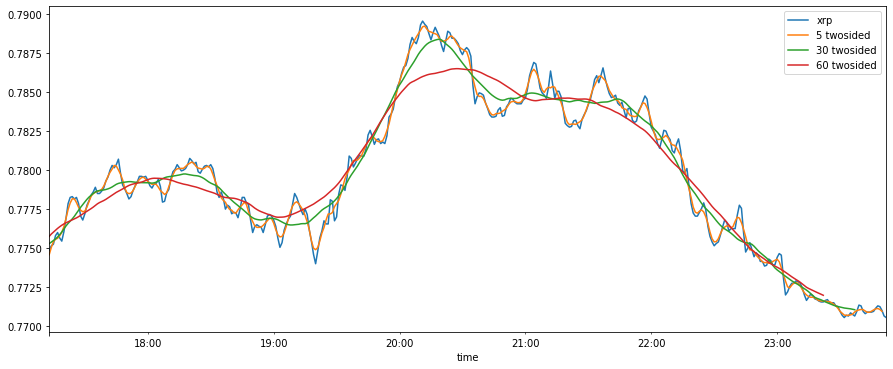

In [75]:
trend5ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 5,  two_sided = True).trend
trend30ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 30,  two_sided = True).trend
trend60ts = smt.seasonal.seasonal_decompose(xrp, model = "additive", period = 60,  two_sided = True).trend

plt.figure(figsize = (15, 6))
xrp.iloc[-400:].plot(label = "xrp")
trend5ts.iloc[-400:].plot(label = "5 twosided")
trend30ts.iloc[-400:].plot(label = "30 twosided")
trend60ts.iloc[-400:].plot(label = "60 twosided")


plt.legend()
plt.show()

###### Best is two-sided with period = 60